In [1]:
from sympy import *

x, y , t, a = symbols("x y t a")
init_printing()

## The analytic solution from Hartmann's test problem 

u = 


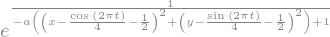

In [20]:
# analytic solution
x0 = Rational(1,2) + Rational(1,4) * cos(2 * pi * t)
y0 = Rational(1,2) + Rational(1,4) * sin(2 * pi * t)
u = exp(1 / (1 - a * ((x-x0)**2 + (y-y0)**2)))

print("u = ")
u

## Computing the initial value

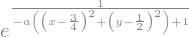

In [21]:
u0 = u.subs(t,0.)
u0

In [22]:
print(str(u0))

exp(1/(-a*((x - 3/4)**2 + (y - 1/2)**2) + 1))


In [23]:
ccode(u0).replace("exp", "sTd::eXp").replace("x","p[0]").replace("X","x").replace("y","p[1]").replace("t","p[2]").replace("T","t").replace("pow", "std::pow").replace("sin", "std::sin").replace("cos", "std::cos") 

'std::exp(1.0/(-a*(std::pow(p[0] - 3.0/4.0, 2) + std::pow(p[1] - 1.0/2.0, 2)) + 1))'

## Computing the derivatives of the analytic solution

∂_t u = 


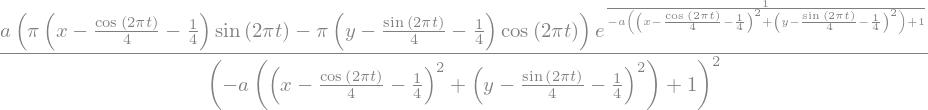

In [13]:
# time derivative
print("∂_t u = ")
diff(u,t)

∂_x u = 


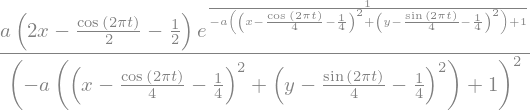

In [14]:
# space derivative w.r.t. x
print("∂_x u = ")
diff(u,x)

∂_y u = 


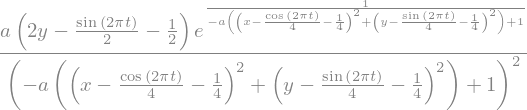

In [15]:
# space derivative w.r.t. y
print("∂_y u = ")
diff(u,y)

f = ∂_t u - ∂_xx u - ∂_yy u = 


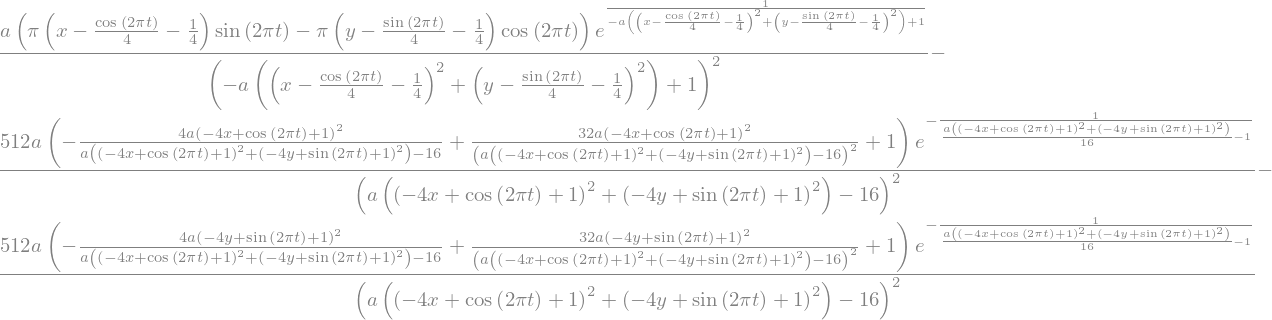

In [16]:
# right hand side f = ∂_t u - ∂_xx u - ∂_yy u
print("f = ∂_t u - ∂_xx u - ∂_yy u = ")
#f = simplify(diff(u,t)-diff(u,x,2)-diff(u,y,2)).rewrite(u)
f = diff(u,t)-diff(u,x,2)-diff(u,y,2)
f

## Generate C++ code for the right hand side f

In [17]:
ccode(f)

'a*(M_PI*(x - 1.0/4.0*cos(2*M_PI*t) - 1.0/4.0)*sin(2*M_PI*t) - M_PI*(y - 1.0/4.0*sin(2*M_PI*t) - 1.0/4.0)*cos(2*M_PI*t))*exp(1.0/(-a*(pow(x - 1.0/4.0*cos(2*M_PI*t) - 1.0/4.0, 2) + pow(y - 1.0/4.0*sin(2*M_PI*t) - 1.0/4.0, 2)) + 1))/pow(-a*(pow(x - 1.0/4.0*cos(2*M_PI*t) - 1.0/4.0, 2) + pow(y - 1.0/4.0*sin(2*M_PI*t) - 1.0/4.0, 2)) + 1, 2) - 512*a*(-4*a*pow(-4*x + cos(2*M_PI*t) + 1, 2)/(a*(pow(-4*x + cos(2*M_PI*t) + 1, 2) + pow(-4*y + sin(2*M_PI*t) + 1, 2)) - 16) + 32*a*pow(-4*x + cos(2*M_PI*t) + 1, 2)/pow(a*(pow(-4*x + cos(2*M_PI*t) + 1, 2) + pow(-4*y + sin(2*M_PI*t) + 1, 2)) - 16, 2) + 1)*exp(-1/((1.0/16.0)*a*(pow(-4*x + cos(2*M_PI*t) + 1, 2) + pow(-4*y + sin(2*M_PI*t) + 1, 2)) - 1))/pow(a*(pow(-4*x + cos(2*M_PI*t) + 1, 2) + pow(-4*y + sin(2*M_PI*t) + 1, 2)) - 16, 2) - 512*a*(-4*a*pow(-4*y + sin(2*M_PI*t) + 1, 2)/(a*(pow(-4*x + cos(2*M_PI*t) + 1, 2) + pow(-4*y + sin(2*M_PI*t) + 1, 2)) - 16) + 32*a*pow(-4*y + sin(2*M_PI*t) + 1, 2)/pow(a*(pow(-4*x + cos(2*M_PI*t) + 1, 2) + pow(-4*y + sin(2

In [18]:
ccode(f).replace("exp", "sTd::eXp").replace("x","p[0]").replace("X","x").replace("y","p[1]").replace("t","p[2]").replace("T","t").replace("pow", "std::pow").replace("sin", "std::sin").replace("cos", "std::cos") 

'a*(M_PI*(p[0] - 1.0/4.0*std::cos(2*M_PI*p[2]) - 1.0/4.0)*std::sin(2*M_PI*p[2]) - M_PI*(p[1] - 1.0/4.0*std::sin(2*M_PI*p[2]) - 1.0/4.0)*std::cos(2*M_PI*p[2]))*std::exp(1.0/(-a*(std::pow(p[0] - 1.0/4.0*std::cos(2*M_PI*p[2]) - 1.0/4.0, 2) + std::pow(p[1] - 1.0/4.0*std::sin(2*M_PI*p[2]) - 1.0/4.0, 2)) + 1))/std::pow(-a*(std::pow(p[0] - 1.0/4.0*std::cos(2*M_PI*p[2]) - 1.0/4.0, 2) + std::pow(p[1] - 1.0/4.0*std::sin(2*M_PI*p[2]) - 1.0/4.0, 2)) + 1, 2) - 512*a*(-4*a*std::pow(-4*p[0] + std::cos(2*M_PI*p[2]) + 1, 2)/(a*(std::pow(-4*p[0] + std::cos(2*M_PI*p[2]) + 1, 2) + std::pow(-4*p[1] + std::sin(2*M_PI*p[2]) + 1, 2)) - 16) + 32*a*std::pow(-4*p[0] + std::cos(2*M_PI*p[2]) + 1, 2)/std::pow(a*(std::pow(-4*p[0] + std::cos(2*M_PI*p[2]) + 1, 2) + std::pow(-4*p[1] + std::sin(2*M_PI*p[2]) + 1, 2)) - 16, 2) + 1)*std::exp(-1/((1.0/16.0)*a*(std::pow(-4*p[0] + std::cos(2*M_PI*p[2]) + 1, 2) + std::pow(-4*p[1] + std::sin(2*M_PI*p[2]) + 1, 2)) - 1))/std::pow(a*(std::pow(-4*p[0] + std::cos(2*M_PI*p[2]) + 1, 2